 # <h1 style='background:#6daa9f; border:0; color:black'><center>HEART FAILURE</center></h1> 
 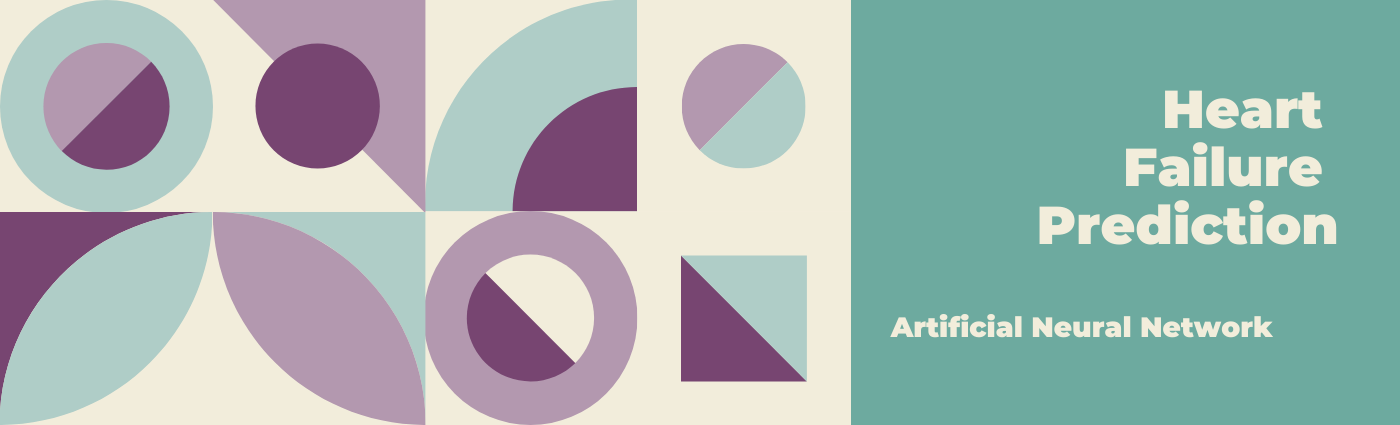

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart. 



# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.utils import to_categorical

2023-02-16 13:24:05.195892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix od the various attributes to examine the feature importance.



<Axes: xlabel='DEATH_EVENT', ylabel='count'>

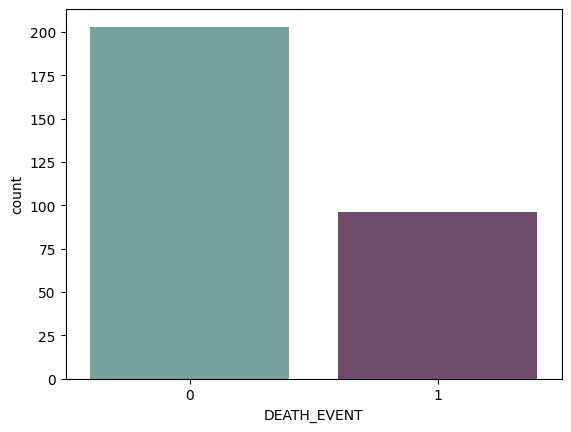

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

Point to note is that there is an imbalance in the data.

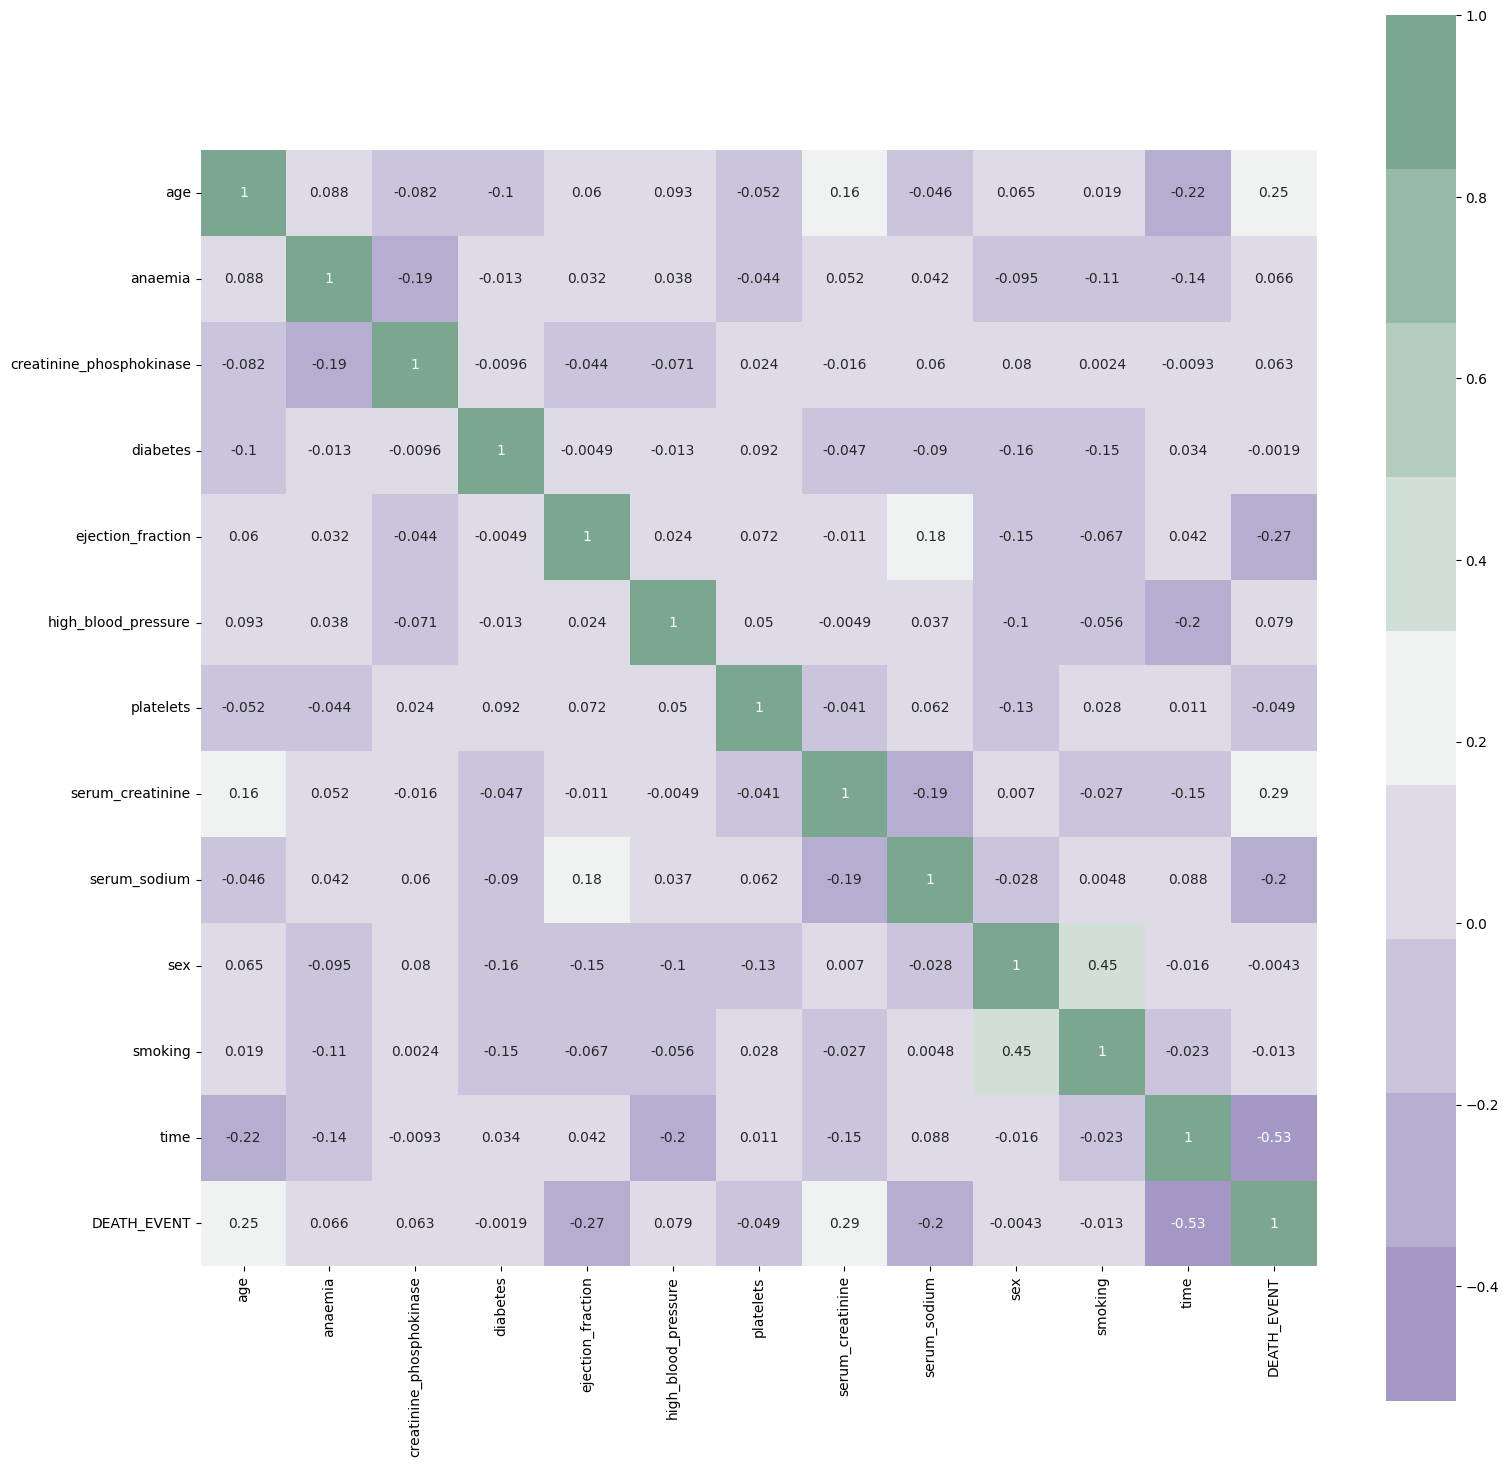

In [5]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**Notable points:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. 
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing 

**Next, we will examine the count plot of age.**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [7]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [8]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [9]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train

array([[-7.02231493e-02,  1.14796753e+00,  1.77729885e-01, ...,
         7.35688190e-01, -6.87681906e-01, -5.06694449e-01],
       [ 4.35044203e-01,  1.14796753e+00, -5.26332642e-01, ...,
         7.35688190e-01, -6.87681906e-01, -1.19519289e-01],
       [-1.24918030e+00, -8.71104775e-01,  1.41597644e-01, ...,
        -1.35927151e+00, -6.87681906e-01, -3.00201030e-01],
       ...,
       [ 1.61400136e+00, -8.71104775e-01, -4.47874061e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.38429148e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.35927151e+00, -6.87681906e-01,  7.06454387e-01],
       [-7.02231493e-02,  1.14796753e+00, -5.02588598e-01, ...,
         7.35688190e-01,  1.45416070e+00,  2.03126678e-01]])

In [10]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int64)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results
     
    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0]))))
    
    return p


In [11]:
# # GRADED FUNCTION: update_parameters_with_gd

# def update_parameters_with_gd(parameters, grads, learning_rate):
#     """
#     Update parameters using one step of gradient descent
    
#     Arguments:
#     parameters -- python dictionary containing your parameters to be updated:
#                     parameters['W' + str(l)] = Wl
#                     parameters['b' + str(l)] = bl
#     grads -- python dictionary containing your gradients to update each parameters:
#                     grads['dW' + str(l)] = dWl
#                     grads['db' + str(l)] = dbl
#     learning_rate -- the learning rate, scalar.
    
#     Returns:
#     parameters -- python dictionary containing your updated parameters 
#     """

#     L = len(parameters) // 2 # number of layers in the neural networks

#     # Update rule for each parameter
#     for l in range(L):
#         ### START CODE HERE ### (approx. 2 lines)
#         parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
#         parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
#         ### END CODE HERE ###
        
#     return parameters

In [12]:
def update_parameters_with_gd(parameters, grads, learning_rate, lr_schedule=None, epoch=None):
    """
    Update parameters using one step of gradient descent with optional dynamic learning rate
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the initial learning rate, scalar.
    lr_schedule -- optional function for updating the learning rate dynamically, taking the current epoch as input.
    epoch -- optional integer indicating the current epoch (for use with lr_schedule).
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Update learning rate if lr_schedule is provided
    if lr_schedule is not None and epoch is not None:
        learning_rate = lr_schedule(epoch)
    
    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters


In [13]:
# def backward_propagation(X, Y, cache):
#     """
#     Implement the backward propagation presented in figure 2.
    
#     Arguments:
#     X -- input dataset, of shape (input size, number of examples)
#     Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
#     cache -- cache output from forward_propagation()
    
#     Returns:
#     gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
#     """
#     m = X.shape[1]
#     (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
  
#     dz3 = 1./m * (a3 - Y)
#     dW3 = np.dot(dz3, a2.T)
#     db3 = np.sum(dz3, axis=1, keepdims = True)
    
#     da2 = np.dot(W3.T, dz3)
#     dz2 = np.multiply(da2, np.int64(a2 > 0))
#     dW2 = np.dot(dz2, a1.T)
#     db2 = np.sum(dz2, axis=1, keepdims = True)
    
#     da1 = np.dot(W2.T, dz2)
#     dz1 = np.multiply(da1, np.int64(a1 > 0))
#     dW1 = np.dot(dz1, X.T)
#     db1 = np.sum(dz1, axis=1, keepdims = True)
    
#     gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
#                  "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
#                  "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
#     return gradients

In [14]:
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation for a neural network with any number of hidden layers.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- output from forward_propagation()
    
    Returns:
    gradients -- a dictionary containing gradients for all weight matrices and bias vectors
    """
    
    gradients = {}
    L = len(cache)  # number of layers
    m = X.shape[1]
    Y = Y.reshape(cache[L-1][0].shape)
    dA = - (np.divide(Y, cache[L-1][0]) - np.divide(1 - Y, 1 - cache[L-1][0]))
    
    # backward propagation for output layer
    current_cache = cache[L-1]
    dZ = dA * sigmoid_backward(dA,current_cache[0])
    gradients["dW" + str(L)] = 1./m * np.dot(dZ, current_cache[1].T)
    gradients["db" + str(L)] = 1./m * np.sum(dZ, axis=1, keepdims=True)
    gradients["dA" + str(L-1)] = np.dot(current_cache[2].T, dZ)
    
    # backward propagation for hidden layers
    for l in reversed(range(1, L-1)):
        current_cache = cache[l]
        dA = gradients["dA" + str(l+1)]
        dZ = dA * relu_backward(dA,current_cache[0])
        gradients["dW" + str(l+1)] = 1./m * np.dot(dZ, current_cache[1].T)
        gradients["db" + str(l+1)] = 1./m * np.sum(dZ, axis=1, keepdims=True)
        gradients["dA" + str(l)] = np.dot(current_cache[2].T, dZ)
    
    # backward propagation for first layer
    current_cache = cache[0]
    dA = gradients["dA" + str(1)]
    dZ = dA * relu_backward(dA,current_cache[0])
    gradients["dW1"] = 1./m * np.dot(dZ, X.T)
    gradients["db1"] = 1./m * np.sum(dZ, axis=1, keepdims=True)
    
    return gradients


In [15]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True)  # convert dA to a correct object.
    dZ[Z <= 0] = 0  # When z <= 0, set dz to 0 as well. 
    
    return dZ


In [16]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    
    return dZ


In [17]:
def compute_cost(a3, Y):
    
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function
    """
    
    m = Y.shape[1]
 
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    return cost

In [18]:
def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

In [19]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [20]:
# def forward_propagation(X, parameters):
#     """
#     Implements the forward propagation (and computes the loss) presented in Figure 2.
    
#     Arguments:
#     X -- input dataset, of shape (input size, number of examples)
#     parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
#                     W1 -- weight matrix of shape ()
#                     b1 -- bias vector of shape ()
#                     W2 -- weight matrix of shape ()
#                     b2 -- bias vector of shape ()
#                     W3 -- weight matrix of shape ()
#                     b3 -- bias vector of shape ()
    
#     Returns:
#     loss -- the loss function (vanilla logistic loss)
#     """
    
#     # retrieve parameters
#     W1 = parameters["W1"]
#     b1 = parameters["b1"]
#     W2 = parameters["W2"]
#     b2 = parameters["b2"]
#     W3 = parameters["W3"]
#     b3 = parameters["b3"]
    
#     # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
#     z1 = np.dot(W1, X) + b1
#     a1 = relu(z1)
#     z2 = np.dot(W2, a1) + b2
#     a2 = relu(z2)
#     z3 = np.dot(W3, a2) + b3
#     a3 = sigmoid(z3)
    
#     cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
#     return a3, cache

In [21]:
def forward_propagation(X, parameters, layer_sizes):
    """
    Implements the forward propagation for a neural network with any number of hidden layers.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing weight matrices and bias vectors for each layer:
                    parameters["W1"], parameters["b1"] correspond to the weights and biases of the first layer, etc.
    layer_sizes -- list of integers specifying the number of nodes in each layer
    
    Returns:
    A -- output of the last layer, of shape (output size, number of examples)
    cache -- a tuple containing the input and output of each layer, and the weight and bias matrices for each layer
    """
    
    L = layer_sizes   # number of layers
    A = X
    cache = []
    
    # forward propagation for hidden layers
    for l in range(1, L-1):
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        Z = np.dot(W, A) + b
        A = relu(Z)
        cache.append((A, Z, W, b))
    
    # forward propagation for output layer
    W = parameters["W" + str(L-1)]
    b = parameters["b" + str(L-1)]
    Z = np.dot(W, A) + b
    A = sigmoid(Z)
    cache.append((A, Z, W, b))
    
    return A, cache


In [22]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m)) 
    
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[permutation].reshape((1, m))
    

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size)# number of mini batches of size mini_batch_size in your partitionning
   
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : ]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [23]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        assert (parameters['W' + str(l)].shape == layer_dims[l], 1)
        
    return parameters

<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:28: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:28: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_99028/2939048296.py:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_99028/2939048296.py:28: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], 1)


In [24]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.01, mini_batch_size = 64
          , num_epochs = 10000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters,L)

            # Compute cost
            cost = compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [25]:
# train 4-layer model
layers_dims = [X_train.shape[0], 5,2, 1]
parameters = model(X_train, y_train, layers_dims, optimizer = "gd")

# Predict
predictions = predict(X_train, y_train, parameters)

ValueError: operands could not be broadcast together with shapes (2,5) (2,2) 